<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/77_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 77: Logistic Regression - Surface Plot & Partial Derivatives

### Teacher-Student Activities

In the previous class, you learnt to differentiate a function to find the slope of a tangent. You also learnt that the slope of a tangent is zero at the points of the maximum and minimum values of a curve as the tangent on those points are parallel to the $x$-axis. In this class, you will learn to create a surface plot which is a kind of three-dimensional plot to visualise the regularised cost function to visually locate the points of its maximum and minimum value.

Let's quickly go through the activities covered in the previous class and begin this class from the **Activity 1: Surface Plot** section.

---

#### Dummy Data

In [ ]:
# Dummy dataset creation using the 'make_blob()' function.
import pandas as pd
from sklearn.datasets import make_blobs

features_array, target_array = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 42, cluster_std = 1.25)

# Object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
print(f"The features array is an {type(features_array)} object.\nThe target array is an {type(target_array)} object.\n")
print(f"The features array has {features_array.shape[0]} rows and {features_array.shape[1]} columns.")
print(f"The target array has {target_array.shape[0]} rows and {len(target_array.shape)} column.")

# Pandas DataFrame creation.
dummy_dict = {'col 1': [features_array[i][0] for i in range(features_array.shape[0])],
             'col 2': [features_array[i][1] for i in range(features_array.shape[0])],
             'target': target_array}

dummy_df = pd.DataFrame.from_dict(dummy_dict)

# The number of occurrences of each label in the 'target' column.
print(f"Target counts:\n{dummy_df['target'].value_counts()}")

The features array is an <class 'numpy.ndarray'> object.
The target array is an <class 'numpy.ndarray'> object.

The features array has 1000 rows and 2 columns.
The target array has 1000 rows and 1 column.
Target counts:
0    500
1    500
Name: target, dtype: int64


---

#### Activity 1: Surface Plot^

Before differentiating the cost function

$$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

to get the optimum values of $\beta_0, \beta_1$ and $\beta_2$, let's visualise it for the different values of $\beta_1$ and $\beta_2$ only. In that case, the regularised cost function becomes

$$J(\beta_1, \beta_2) = -\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m}(\beta_1 ^2 + \beta_2 ^2)$$

where

$$p_i = \frac{1}{1 + e^{-(\beta_1 x_{i1} + \beta_2 x_{i2})}}$$

For this, you need to create a surface plot which is a three-dimensional graph because you need three axes:

1. One axis for plotting the $\beta_1$ values

2. Another axis for plotting the $\beta_2$ values

3. One more axis for plotting the $J$ values

To create a three-dimensional plot, you need to

- Import the  `Axes3D`  class from the `mpl_toolkits.mplot3d` module

- Create an array containing the values for $x$-axis. In this case, $\beta_1$ values

- Create an array containing the values for $y$-axis. In this case, $\beta_2$ values

- Create an $N$-dimensional array containing the ordered pairs of $x$-$y$ values i.e. $(x, y)$. In this case, $(\beta_1, \beta_2)$ ordered pairs. You can do this using the `meshgrid(array1, array2)` function of the `numpy` module where the `array1` and `array2` are the arrays whose values will be used to create ordered pairs.

- Finally, you need to use the `plot_surface()` function of the `Axes3D` class of the `mpl_toolkits.mplot3d` module.

beta value= [[-3.         -2.99399399]
 [-2.98798799 -2.98198198]
 [-2.97597598 -2.96996997]
 [-2.96396396 -2.95795796]
 [-2.95195195 -2.94594595]]
feature value= [[-1.46458248  7.60215256]
 [ 6.73700485  1.28118438]
 [ 3.26953498  0.17310608]
 [ 5.2934232   1.25604468]
 [ 4.41427894  5.96455414]]
target value= [0 1 1 1 1]


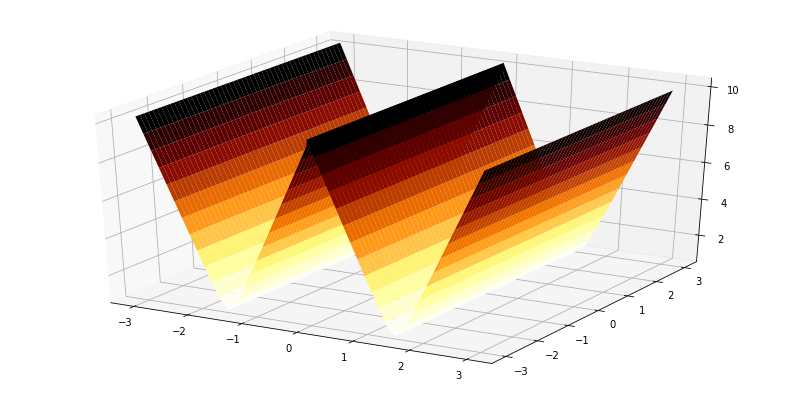

In [ ]:
# S1.1: Create a surface plot to visualise the regularised cost function as a function of 'beta1' and 'beta2' only.
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm #cm is color map
m=features_array.shape[0]
beta1=np.linspace(-3,3,m)
beta2=np.linspace(-3,3,m)
beta=np.array([beta1,beta2]).reshape(m,2)
print("beta value=",beta[:5])
print("feature value=",features_array[:5])
print("target value=",target_array[:5])
def sigmoid(x):
  return 1/(1+np.exp(-x))
def reg_cost_func(beta):
  cost_func_values=[]
  for i in range(m):
    error1=target_array.reshape(1,m)*np.log(sigmoid(np.matmul(beta[i],np.transpose(features_array))))
    error2=(1-target_array.reshape(1,m))*np.log(1-sigmoid(np.matmul(beta[i],np.transpose(features_array))))
    cost=-(1/m)*np.sum(error1+error2)+10/(2*m)*np.sum(beta[i]**2)
    cost_func_values.append(cost)
  return cost_func_values
cost_func_val=reg_cost_func(beta)
meshgrid_beta1,meshgrid_beta2=np.meshgrid(beta1,beta2)
fig=plt.figure(figsize=(14,7))
ax=fig.gca(projection='3d')
ax.plot_surface(meshgrid_beta1,meshgrid_beta2,np.array(cost_func_val).reshape(1,m),cmap = cm.afmhot_r)
plt.show()





As you can see, we have created a three-dimensional plot (surface plot to be specific) for the regularised cost function for 1000 different set of $\beta_1$ and $\beta_2$ values. You can see that the cost function has its lowest values at points between $\beta_1 = -2$ and $\beta_1 = -1$, $\beta_1 = 1$ and $\beta_1 = 2$ and $\beta_2 = -3$ and $\beta_2 = 4$.

**Note:** The real cost function for the dummy dataset is dependent on all the three betas. So, the above three-dimensional plot does not represent the real cost function. In order to visualise the cost function, we discarded $\beta_0$ because it is physically impossible to create a four-dimensional plot. You could have also discarded either $\beta_1$ or $\beta_2$ instead of $\beta_0$ to create a three-dimensional plot.

In the `for` loop in the above code i.e.:

```
error1 = target_array.reshape(1, m) * np.log(sigmoid(np.matmul(beta[i], np.transpose(features_array))))
error2 = (1 - target_array.reshape(1, m)) * np.log(1 - sigmoid(np.matmul(beta[i], np.transpose(features_array))))
cost = - (1 / m) * np.sum(error1 + error2) + 10 / (2 * m) * np.sum(beta[i] ** 2)
cost_func_values.append(cost)
```

- The `np.matmul(beta[i], np.transpose(features_array))` multiplies the $B = \begin{bmatrix} \beta_1 & \beta_2\end{bmatrix}$ matrix with the $X = \begin{bmatrix}x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ \vdots & \vdots \\ x_{10001} & x_{10002} \end{bmatrix}$ matrix i.e. $BX^T$

- The `sigmoid(np.matmul(beta[i], np.transpose(features_array)))` part calculates the probabilities i.e. $p = \frac{1}{1 + e^{-BX^T}}$for one set of $\beta$ values

- The `error1` variable stores the $y_i \log p_i$ part of the cost function for one set of $\beta$ values

- The `error2` variable stores the $(1 - y_i) \log (1 - p_i)$ part of the cost function one set of $\beta$ values

- The `cost` variable stores the regularised cost function $-\frac{1}{m} \sum_{i = 1}^m \{ y_i \log p_i + (1 - y_i) \log(1 - p_i) \} + \frac{\lambda}{2m}(\beta_1 ^2 + \beta_2 ^2)$ value one set of $\beta$ values

- The `cost_func_values` list stores the regularised cost function values for all the 1000 set of $\beta$ values.

The `np.meshgrid(beta1, beta2)` function creates ordered pairs for the `beta1` and `beta2` array values and stores them in the `meshed_beta1` and `meshed_beta2` variables.

The `plt.figure(figsize = (10, 6), dpi = 96)` function creates a `matplotlib` figure object and stores it in the `fig` variable.

The `gca(projection = '3d')` function is called on the figure object created above with `projection` as a parameter and its value equal to `'3d'` which asks the `matplotlib.pyplot` object to **get** the **current axis** (full form of GCA). And the parameter, `projection = '3d'`, denotes to get three axes i.e. $x, y, z$ to create a three-dimensional plot. This 3D axis is stored in the `ax` variable.

On the 3D axis stored in the `ax` variable, the `plot_surface()` function is called to create a surface plot between $\beta_1, \beta_2$ and $J$ for which `meshed_beta1, meshed_beta2, np.array(cost_func_values).reshape(1, m)` inputs are passed to the function. The additional parameter `cmap` (short-form for **colour-map**) defines the colour of the surface plot for which the `cm.coolwarm` value is passed. The `cost_func_values` stores a Python list that is converted to a `numpy` array and having 1 row and 1000 columns.

---

#### Activity 2: Rules of Derivatives^^

Continuing with the motivation to differentiate the regularised cost function

$$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

to obtain the optimum beta values, let's quickly go through the rules of derivatives.

In the last class, you used the following approach to differentiate $y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$ wrt $x$

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
\end{equation}

This is called the first-principle approach. It takes a lot of time to calculate derivatives. Hence, to quicken up the calculation of derivatives, you can use a set of rules of derivatives that are derived using the first principle approach. Eg.

To differentiate $y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$ wrt $x$, you can use the following rule

\begin{align}
y &= kx^n \\
\frac{dy}{dx} &= k \frac{d(x^n)}{dx}  \\
\Rightarrow \frac{dy}{dx} &= kn x^{n - 1}
\end{align}

which says that the differentiation of a function $y = kx^n$ is $kn$ times $x$ raised to power $n - 1$ where

- $k$ is some arbitrary constant and $k \neq 0$

- $n$ is some real number and $n \neq 0$

If $n = 0$, the function becomes $y = k$ and its differentiation wrt any variable $\frac{dy}{dx} = 0$

So, here are the two rules of derivatives that we just discovered.

**Rule 1:** For $y = kx^n$
\begin{equation}
\frac{dy}{dx} = kn x^{n - 1}
\end{equation}

**Rule 2:** For $y = k$
\begin{equation}
\frac{dy}{dx} = 0
\end{equation}

Let's apply the first rule to differentiate the function $y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$ wrt $x$

\begin{align}
\frac{dy}{dx} &= \frac{1}{5} \times \frac{d(x^5)}{dx} - \frac{26}{3} \times \frac{d(x^3)}{dx} + 25 \times \frac{d(x)}{dx} \\
&= \frac{1}{5}\times 5 x^{5 - 1} - \frac{26}{3} \times 3 x^{3 - 1} + 25 x^{1 - 1}\\
&= x^4 - 26x^2 + 25
\end{align}

Since we need to differentiate log that is present in the cost function, let's now learn the rule to differentiate a logarithmic function.

**Rule 3:** For $y = \log x$
\begin{equation}
\frac{dy}{dx} = \frac{1}{x}
\end{equation}

If you extend the log function further to $y = \log (kx^n)$, then its derivative wrt $x$ is

\begin{equation}
\frac{dy}{dx} = \frac{1}{kx^n} \times \frac{d(kx^n)}{dx} \\
\end{equation}

$\qquad \qquad \qquad \qquad$ [Whatever written in the log goes to the denominator $\times$ The derivative of whatever written in the log]

\begin{align}
\frac{dy}{dx} &= \frac{1}{kx^n} \times kn x^{n - 1} \\
\Rightarrow \frac{dy}{dx} &= \frac{n}{x}
\end{align}

**Rule 4:** For $y =  e^x$
\begin{equation}
\frac{dy}{dx} = e^{x}
\end{equation}

If you extend the exponential function further to $y = e^{kx^n}$, then its derivative wrt $x$ is

\begin{equation}
\frac{dy}{dx} = e^{kx^n} \times \frac{d(kx^n)}{dx} \\
\end{equation}

$\qquad \qquad \qquad \qquad$ [$e^{kx^n}$ remains as it is $\times$ The derivative of whatever written in the power of $e$]

\begin{align}
\Rightarrow \frac{dy}{dx} &= e^{kx^n} \times kn x^{n - 1}
\end{align}

Using these four rules, finally, we can now differentiate the regularised cost function.



---

#### Activity 3: Derivative of Regularised Cost Function^^^

Let's first differentiate the cost function wrt to $\beta_0$ and simultaneously, we will treat $\beta_1, \beta_2, \beta_3, \dots, \beta_n$ as constants i.e as $y = k$ whose derivative will be 0. This is called partial derivatives.

**Note:** At this point, you don't need to know the meaning of partial derivatives. Just treat one of the betas as an independent variable at a time and all the other betas as constants.

In the case of partial derivatives, the $\partial$ symbol is used instead of the $d$ symbol. It is commonly pronounced as either **del** or **doh**.

\begin{align}
J &= - \frac{1}{m} \sum_{i = 1} ^{m} (y_i \log p_i  + (1 - y_i) \log(1 - p_i)) + \frac{\lambda}{2m}(\beta_1^2 + \beta_2^2 + \dots + \beta_n^2)\\
\frac{\partial J}{\partial \beta_0} &=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i \times \frac{1}{p_i} \times \frac{\partial p_i}{\partial \beta_0} + (1 - y_i) \times \frac{-1}{1 - p_i} \times \frac{\partial p_i}{\partial \beta_0} \right) + \frac{\lambda}{2m}\times 0
\end{align}

We know that

\begin{align}
p_i &= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} \\
\therefore \frac{\partial p_i}{\partial \beta_0} &= - \left( \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} \right)^2 (0 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})(-1 + 0) \\
&= \frac{e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
\end{align}

On adding $-1$ and $1$ to the above equation, we get

\begin{align}
\therefore \frac{\partial p_i}{\partial \beta_0} &= \frac{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)} - 1}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
&= \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}} - \frac{1}{(1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)})^2} \\
&= p_i - p_i^2 \\
&= p_i(1 - p_i)
\end{align}

On substituting $\frac{\partial p_i}{\partial \beta_0}$ in the derivative of the cost function wrt $\beta_0$, we get

\begin{align}
\frac{\partial J}{\partial \beta_0} &=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i \times \frac{1}{p_i} \times p_i(1 - p_i) + (1 - y_i) \times \frac{-1}{1 - p_i} \times p_i(1 - p_i) \right) \\
&=  - \frac{1}{m} \sum_{i = 1} ^{m} \left( y_i (1 - p_i) - (1 - y_i) p_i\right) \\
&=  - \frac{1}{m} \sum_{i = 1} ^{m} (y_i  - y_i p_i - p_i + y_i p_i) \\
\Rightarrow \frac{\partial J}{\partial \beta_0} &=  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)
\end{align}

Similarly, if you differentiate $J$ wrt to $\beta_1$, you will get

\begin{equation}
\frac{\partial J}{\partial \beta_1} =  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_1 + \frac{\lambda}{m} \beta_1 \\
\end{equation}

In general, for $\beta_j = \beta_1$ to $\beta_n$, you will get

\begin{equation}
\frac{\partial J}{\partial \beta_j} =  \frac{1}{m} \sum_{i = 1} ^{m} (p_i  - y_i)x_j + \frac{\lambda}{m} \beta_j \\
\end{equation}

Let's stop here. In the next class, you will learn to implement these derivatives in Python to calculate the optimum values of $\beta_0, \beta_1$ and $\beta_2$